# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = np.size(y_train)

# TODO: Number of validation examples
n_validation = np.size(y_valid)

# TODO: Number of testing examples.
n_test = np.size(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation) #added
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import csv

labels = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    labels = {int(rows[0]):rows[1] for rows in reader}

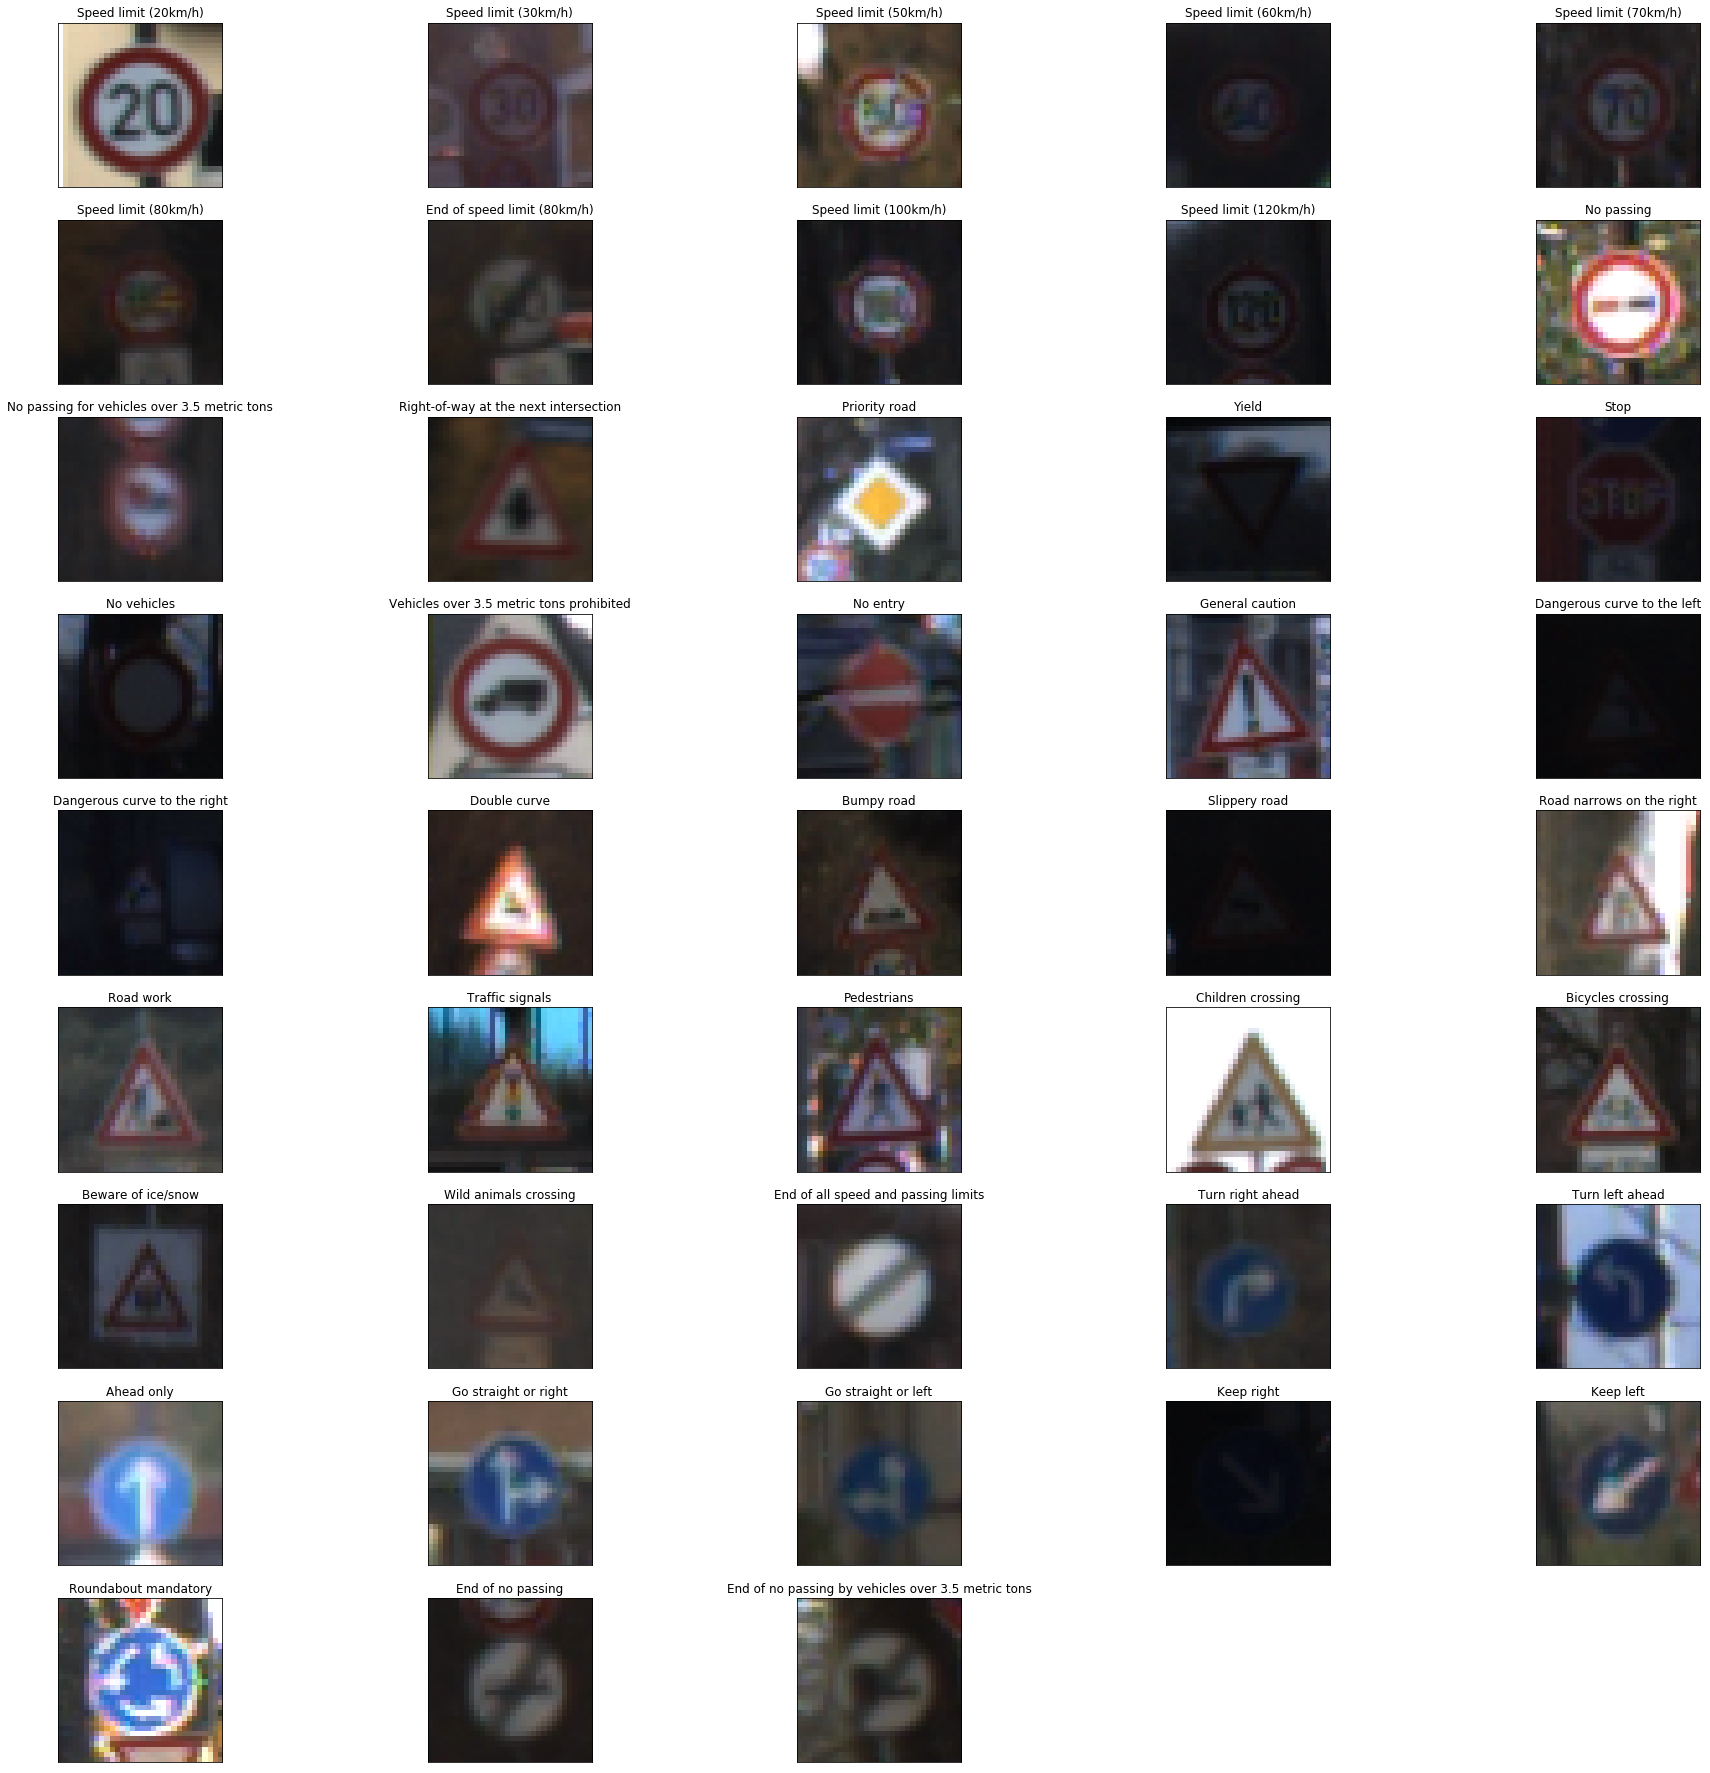

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

### Visualizing Data for Each Label
fig = plt.figure(figsize=(32,32))
for i in range(n_classes):
    k = np.where(y_train==i)
    img = X_train[k[0][0]]
    img_ycbcr = cv2. cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    #img_ycbcr[:,:,0] = cv2.equalizeHist(img_ycbcr[:,:,0])
    img = cv2. cvtColor(img_ycbcr, cv2.COLOR_YCrCb2BGR)    
    ax = fig.add_subplot(int(n_classes/5)+1,5,i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(img, interpolation='none')
    ax.set_title(labels[y_train[k[0][0]]])
plt.show()

0. Speed limit (20km/h) - Samples: 180


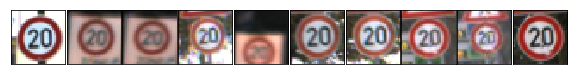

1. Speed limit (30km/h) - Samples: 1980


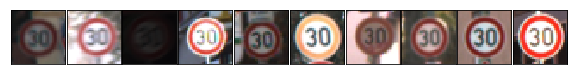

2. Speed limit (50km/h) - Samples: 2010


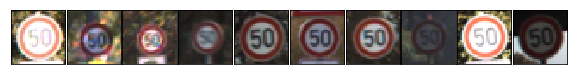

3. Speed limit (60km/h) - Samples: 1260


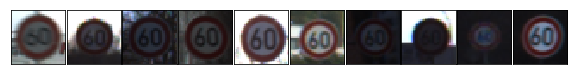

4. Speed limit (70km/h) - Samples: 1770


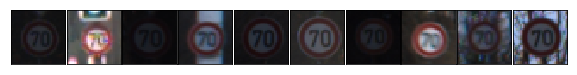

5. Speed limit (80km/h) - Samples: 1650


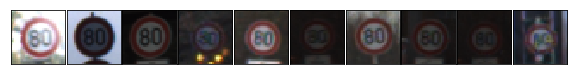

6. End of speed limit (80km/h) - Samples: 360


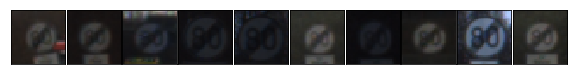

7. Speed limit (100km/h) - Samples: 1290


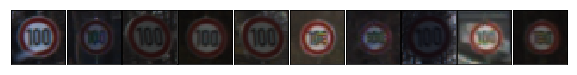

8. Speed limit (120km/h) - Samples: 1260


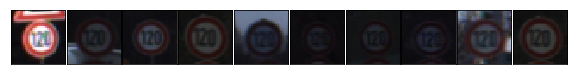

9. No passing - Samples: 1320


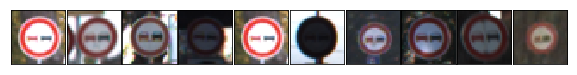

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


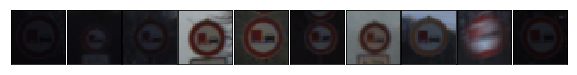

11. Right-of-way at the next intersection - Samples: 1170


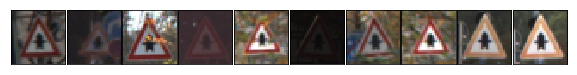

12. Priority road - Samples: 1890


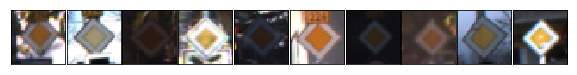

13. Yield - Samples: 1920


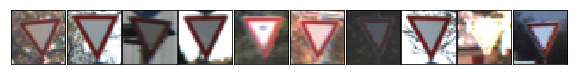

14. Stop - Samples: 690


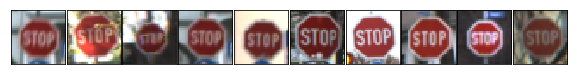

15. No vehicles - Samples: 540


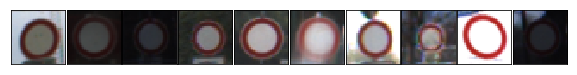

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


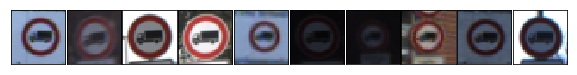

17. No entry - Samples: 990


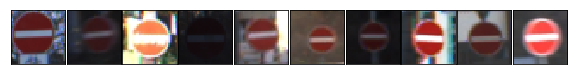

18. General caution - Samples: 1080


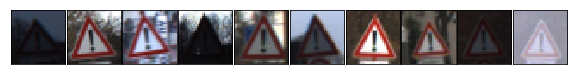

19. Dangerous curve to the left - Samples: 180


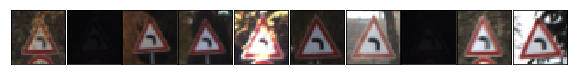

20. Dangerous curve to the right - Samples: 300


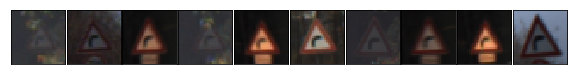

21. Double curve - Samples: 270


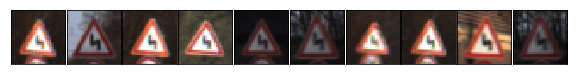

22. Bumpy road - Samples: 330


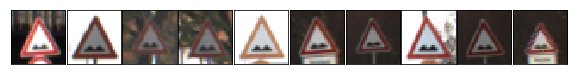

23. Slippery road - Samples: 450


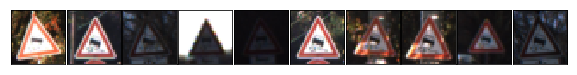

24. Road narrows on the right - Samples: 240


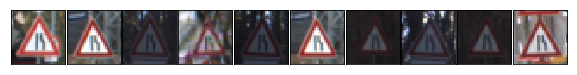

25. Road work - Samples: 1350


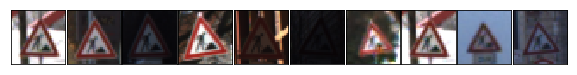

26. Traffic signals - Samples: 540


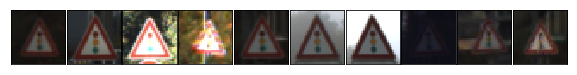

27. Pedestrians - Samples: 210


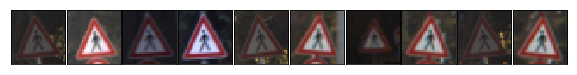

28. Children crossing - Samples: 480


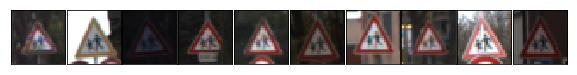

29. Bicycles crossing - Samples: 240


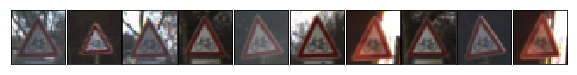

30. Beware of ice/snow - Samples: 390


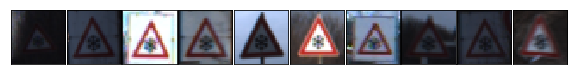

31. Wild animals crossing - Samples: 690


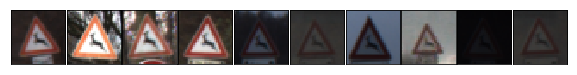

32. End of all speed and passing limits - Samples: 210


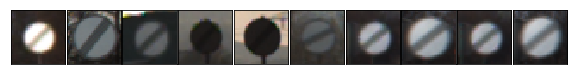

33. Turn right ahead - Samples: 599


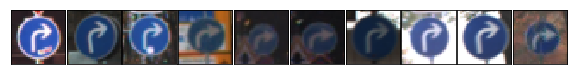

34. Turn left ahead - Samples: 360


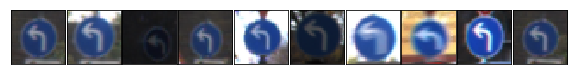

35. Ahead only - Samples: 1080


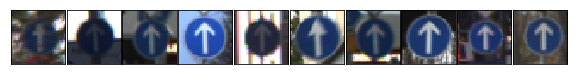

36. Go straight or right - Samples: 330


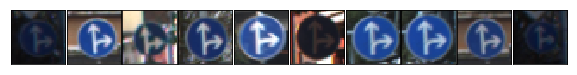

37. Go straight or left - Samples: 180


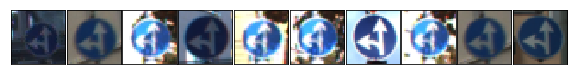

38. Keep right - Samples: 1860


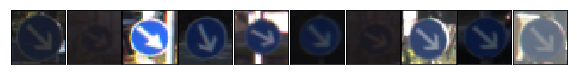

39. Keep left - Samples: 270


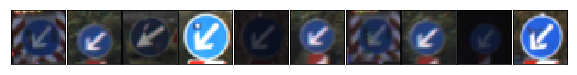

40. Roundabout mandatory - Samples: 300


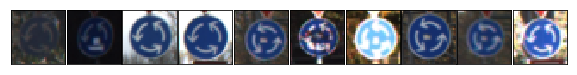

41. End of no passing - Samples: 210


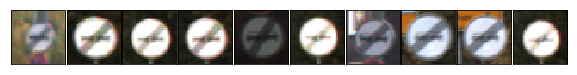

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


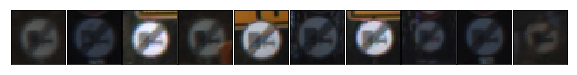

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

ind = np.arange(n_classes)

hist_train, bins = np.histogram( y_train, n_classes)

samples_per_sign = 10
for i in range(n_classes):
    print("{0}. {1} - Samples: {2}".format(i, labels[i], hist_train[i]))
    sample_indices = np.where(y_train==i)[0]
    random_samples = random.sample(list(sample_indices), samples_per_sign)
    fig = plt.figure(figsize = (samples_per_sign, 1))
    fig.subplots_adjust(hspace = 0, wspace = 0)
    for i in range(samples_per_sign):
        image = X_train[random_samples[i]]
        ax = fig.add_subplot(1,samples_per_sign, i+1, xticks=[], yticks=[])
        ax.imshow(image.squeeze())
    plt.show()

0. Speed limit (20km/h) - Samples: 180


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


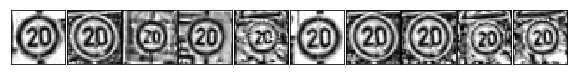

1. Speed limit (30km/h) - Samples: 1980


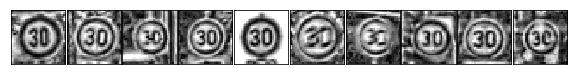

2. Speed limit (50km/h) - Samples: 2010


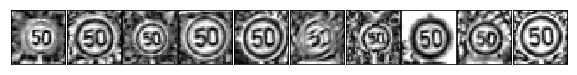

3. Speed limit (60km/h) - Samples: 1260


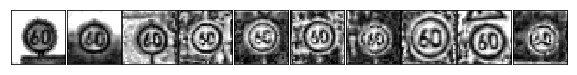

4. Speed limit (70km/h) - Samples: 1770


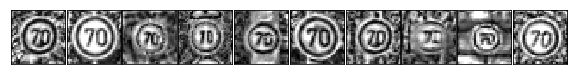

5. Speed limit (80km/h) - Samples: 1650


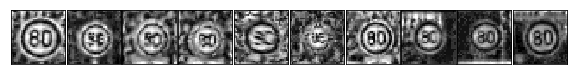

6. End of speed limit (80km/h) - Samples: 360


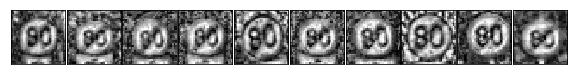

7. Speed limit (100km/h) - Samples: 1290


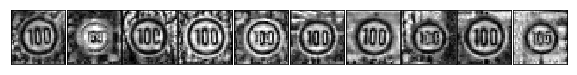

8. Speed limit (120km/h) - Samples: 1260


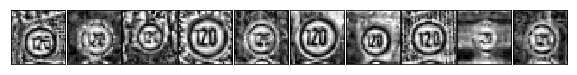

9. No passing - Samples: 1320


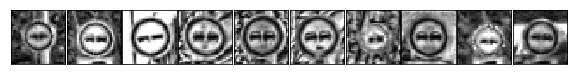

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


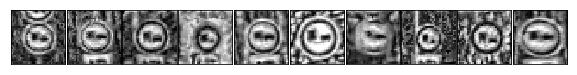

11. Right-of-way at the next intersection - Samples: 1170


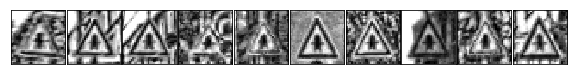

12. Priority road - Samples: 1890


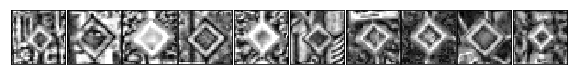

13. Yield - Samples: 1920


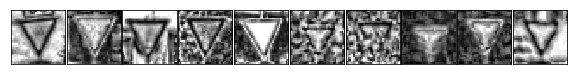

14. Stop - Samples: 690


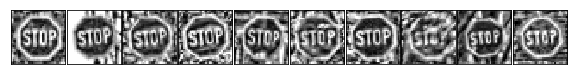

15. No vehicles - Samples: 540


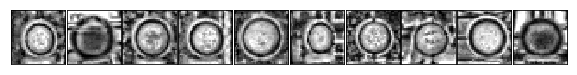

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


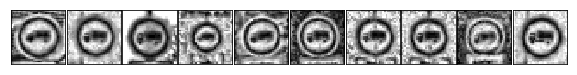

17. No entry - Samples: 990


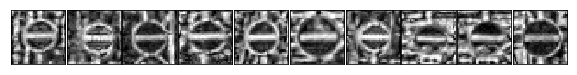

18. General caution - Samples: 1080


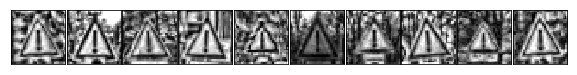

19. Dangerous curve to the left - Samples: 180


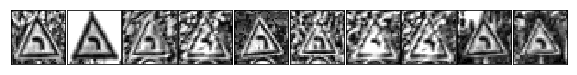

20. Dangerous curve to the right - Samples: 300


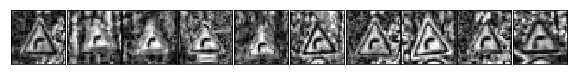

21. Double curve - Samples: 270


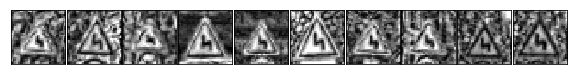

22. Bumpy road - Samples: 330


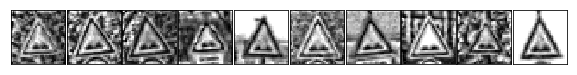

23. Slippery road - Samples: 450


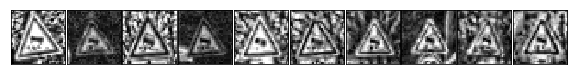

24. Road narrows on the right - Samples: 240


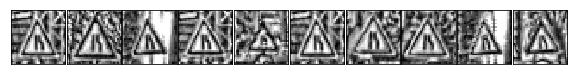

25. Road work - Samples: 1350


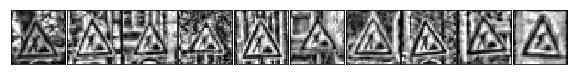

26. Traffic signals - Samples: 540


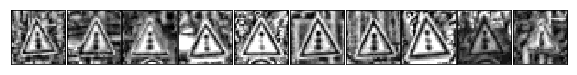

27. Pedestrians - Samples: 210


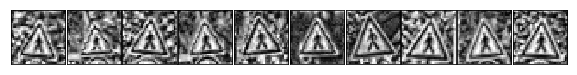

28. Children crossing - Samples: 480


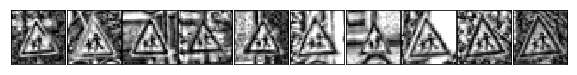

29. Bicycles crossing - Samples: 240


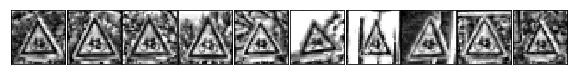

30. Beware of ice/snow - Samples: 390


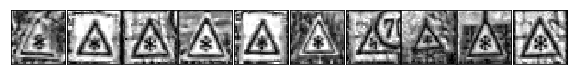

31. Wild animals crossing - Samples: 690


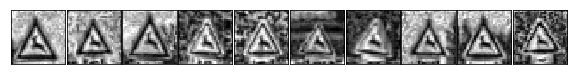

32. End of all speed and passing limits - Samples: 210


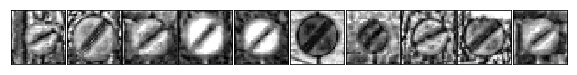

33. Turn right ahead - Samples: 599


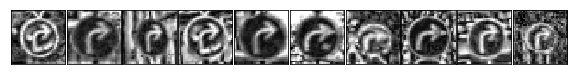

34. Turn left ahead - Samples: 360


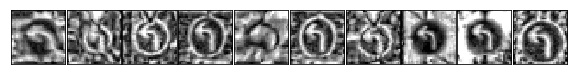

35. Ahead only - Samples: 1080


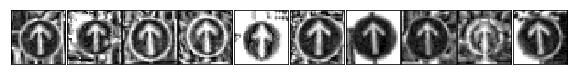

36. Go straight or right - Samples: 330


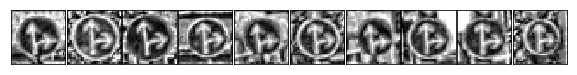

37. Go straight or left - Samples: 180


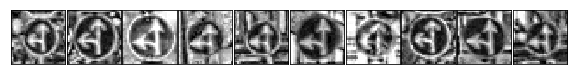

38. Keep right - Samples: 1860


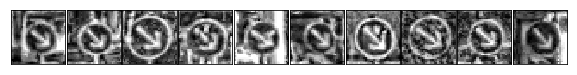

39. Keep left - Samples: 270


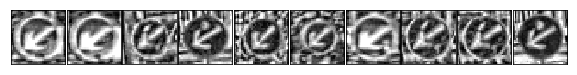

40. Roundabout mandatory - Samples: 300


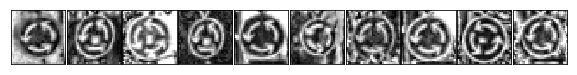

41. End of no passing - Samples: 210


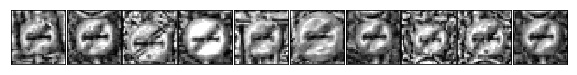

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


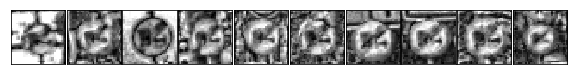

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import cv2

from sklearn.utils import shuffle
from skimage import data, img_as_float
from skimage import exposure, color

def normalize(img):
    #data[0]
    #print(data.shape)
    
    row = img.shape[0]
    col = img.shape[1]
    ch = img.shape[2]  
 
    img = color.rgb2gray(img)
    img_rescale = exposure.equalize_adapthist(img, clip_limit=0.03)

    return img_rescale.reshape( row, col, 1)

%matplotlib inline

ind = np.arange(n_classes)

hist_train, bins = np.histogram( y_train, n_classes)

samples_per_sign = 10
for i in range(n_classes):
    print("{0}. {1} - Samples: {2}".format(i, labels[i], hist_train[i]))
    sample_indices = np.where(y_train==i)[0]
    random_samples = random.sample(list(sample_indices), samples_per_sign)
    fig = plt.figure(figsize = (samples_per_sign, 1))
    fig.subplots_adjust(hspace = 0, wspace = 0)
    for i in range(samples_per_sign):
        image = X_train[random_samples[i]]
        image = normalize(image)
        ax = fig.add_subplot(1,samples_per_sign, i+1, xticks=[], yticks=[])
        ax.imshow(image.squeeze(), cmap='gray')
    plt.show()

#### Bar plot of Training Set

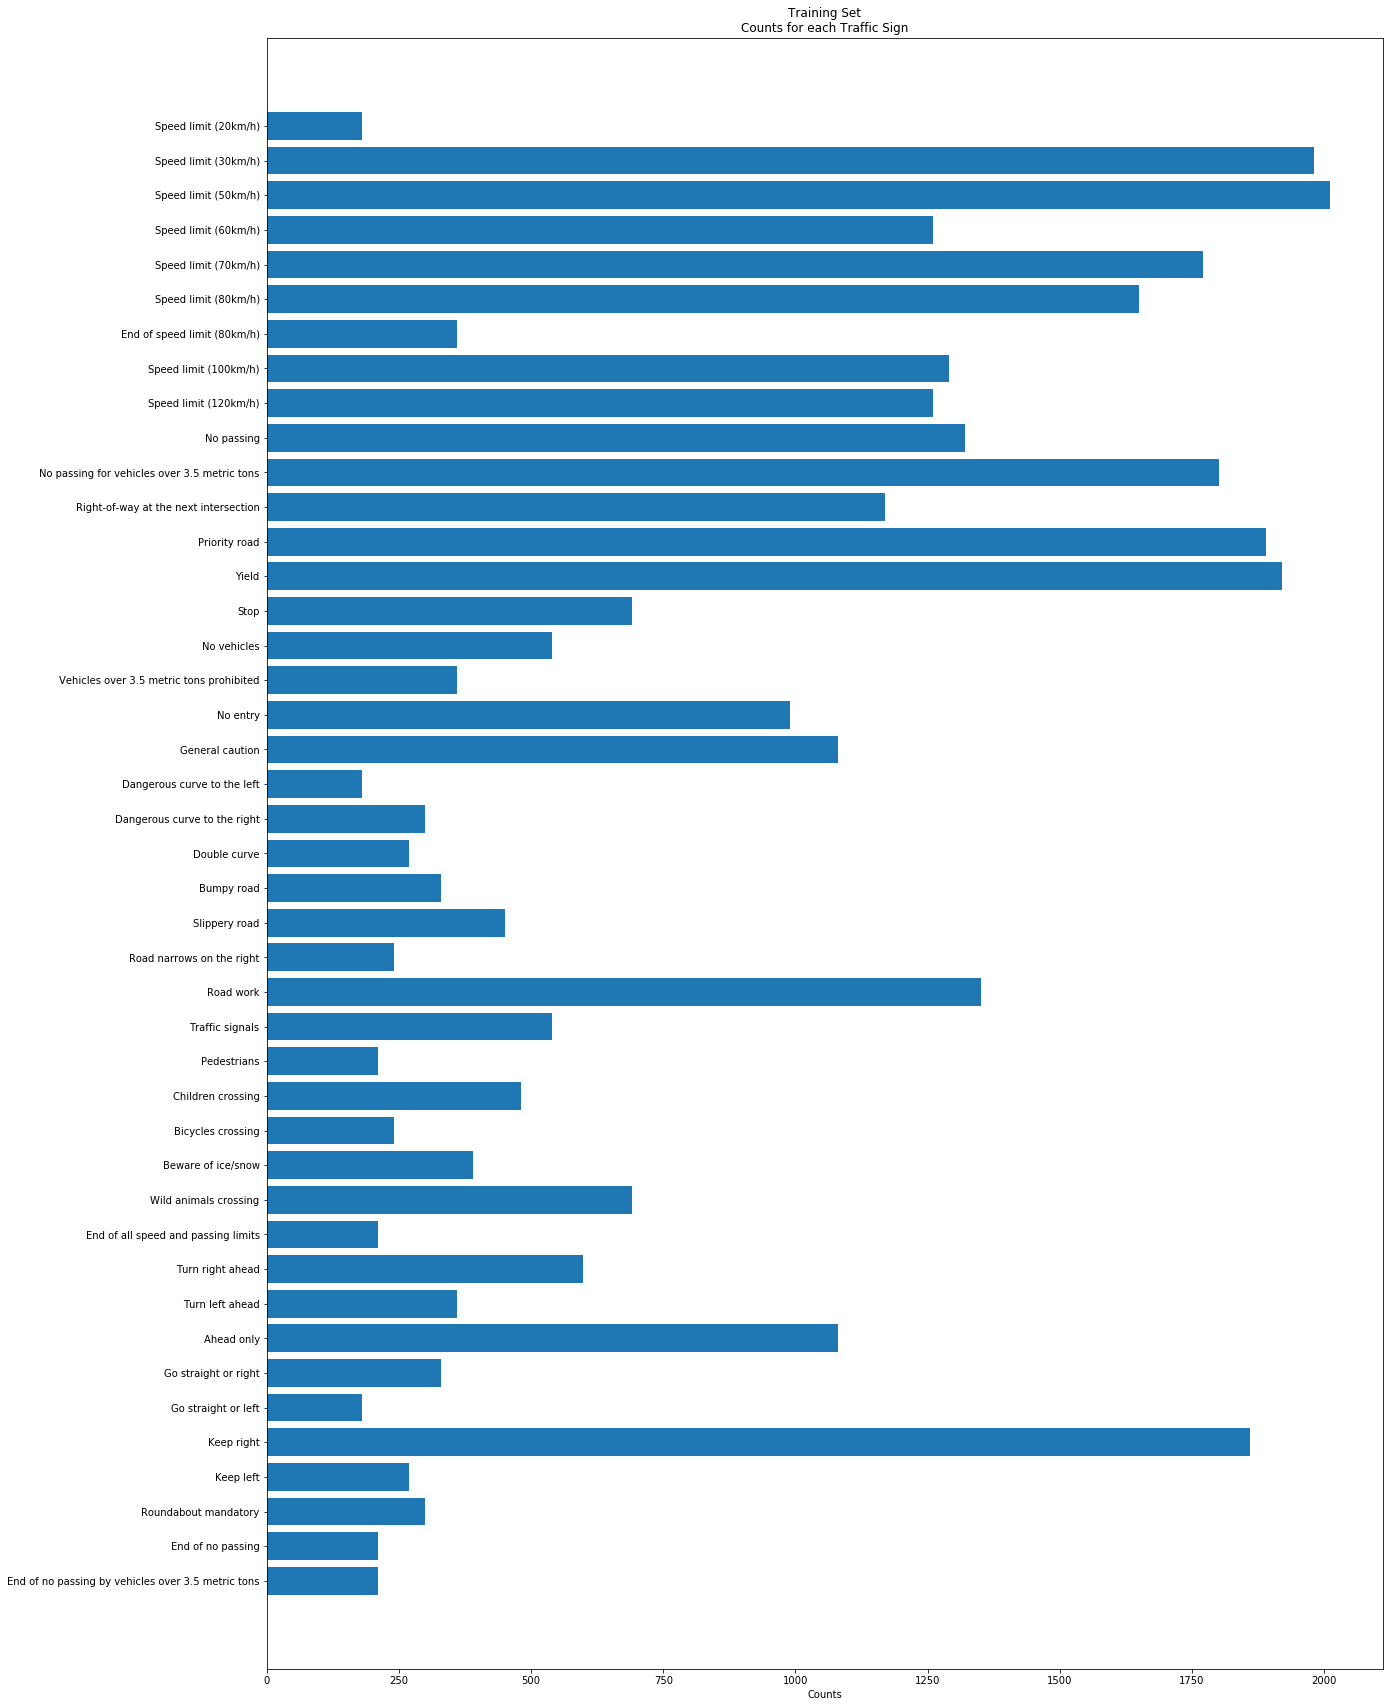

Training Set Max Bin = [2]
Training Set Max value =  2010


In [7]:
### Count of each class in train and validation set
ind = np.arange(n_classes)

hist_train, bins = np.histogram( y_train, n_classes)
bin_max = np.where(hist_train == hist_train.max())
max_bin_val = hist_train.max()


fig, ax = plt.subplots()
#set_train = ax.hist(lab_train, ind)
set_train = ax.barh(ind, hist_train)

# add some text for labels, title and axes ticks
ax.set_xlabel('Counts')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(ind)
ax.set_yticklabels(labels.values())
ax.set_title('Training Set\nCounts for each Traffic Sign')

fig.set_figheight(30)
fig.set_figwidth(20)

plt.show()


print("Training Set Max Bin =", ind[bin_max[0]])
print("Training Set Max value = ", max_bin_val)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
import numpy as np
import cv2
from sklearn.utils import shuffle
from skimage import data, img_as_float
from skimage import exposure, color

def image_translate(img):
    row = img.shape[0]
    col = img.shape[1]
    ch = img.shape[2]    
    
    x = img.shape[0]
    y = img.shape[1]   
    x_shift = np.random.uniform(-0.1 * x, 0.1 * x)
    y_shift = np.random.uniform(-0.1 * y, 0.1 * y)

    shift_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shift_img = cv2.warpAffine(img, shift_matrix, (x, y))
    return shift_img.reshape( row, col, ch)


def image_rotate(img):
    row = img.shape[0]
    col = img.shape[1]
    ch = img.shape[2]

    angle = np.random.uniform(-10, 10)
    rotation_point = (row / 2, col / 2)
    rotation_matrix = cv2.getRotationMatrix2D(rotation_point, angle, 1)
    #print(rotation_matrix)

    rotated_img = cv2.warpAffine(img, rotation_matrix, (col, row))
    return rotated_img.reshape( row, col, ch)


def normalize(img):
    #data[0]
    #print(data.shape)
    
    row = img.shape[0]
    col = img.shape[1]
    ch = img.shape[2]  
 
    img = color.rgb2gray(img)
    img_rescale = exposure.equalize_adapthist(img, clip_limit=0.03)

    return img_rescale.reshape( row, col, 1)

In [9]:
#create new images of each class
X_train_aug = []
y_train_aug = []

#----------------------------------------------------------------------------------------
#README: The data augmentation portion was turned off as adding the images had *DECREASED* 
#the validation accuracy.
#----------------------------------------------------------------------------------------
if 1:
    #gather all the orginal images of each class
    for i in range(n_classes):
        k = np.where(y_train==i)
        class_samples = len(k [0])    
        #first add your existing classes
        wt = np.random.uniform(0.3, 1.1)
        num_add = int(wt*(max_bin_val - class_samples))
        for j in range(num_add):
            #grab a random image from the class
            img_idx = np.random.randint(0,len(k))
            img = X_train[k[0][img_idx]]
            #image_shape = img.shape

            temp_img = normalize(img)
            temp_img = image_rotate(temp_img)
            temp_img = image_translate(temp_img)

            X_train_aug.append(temp_img)
            y_train_aug.append(i)         
        print("Finished augmenting samples to class  {}: {}".format(i,labels[i]))

#insert orignal info
for i in range(len(y_train)):
    X_train_aug.append(normalize(X_train[i]))
    y_train_aug.append(y_train[i])
    if i % 1000 == 0:
        print( '{} of {}'.format(i, len(y_train)))
    
#X_train_aug = X_train_aug.astype(np.float32)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Finished augmenting samples to class  0: Speed limit (20km/h)
Finished augmenting samples to class  1: Speed limit (30km/h)
Finished augmenting samples to class  2: Speed limit (50km/h)
Finished augmenting samples to class  3: Speed limit (60km/h)
Finished augmenting samples to class  4: Speed limit (70km/h)
Finished augmenting samples to class  5: Speed limit (80km/h)
Finished augmenting samples to class  6: End of speed limit (80km/h)
Finished augmenting samples to class  7: Speed limit (100km/h)
Finished augmenting samples to class  8: Speed limit (120km/h)
Finished augmenting samples to class  9: No passing
Finished augmenting samples to class  10: No passing for vehicles over 3.5 metric tons
Finished augmenting samples to class  11: Right-of-way at the next intersection
Finished augmenting samples to class  12: Priority road
Finished augmenting samples to class  13: Yield
Finished augmenting samples to class  14: Stop
Finished augmenting samples to class  15: No vehicles
Finished 

In [10]:
from sklearn.utils import shuffle
from skimage import data, img_as_float
from skimage import exposure, color

def normalize_batch(data):
    #data = (data-127.5) / 255.0
    bat = []
    for i in range(0, len(data)):
        img = data[i]
        img = color.rgb2gray(img)
        img_rescale = exposure.equalize_adapthist(img, clip_limit=0.03)
        #img_rescale = img - 127.5 / 255.0
        bat.append(img_rescale)
    data = np.reshape(bat, (-1, 32, 32, 1))
    return data


if 1:
    #X_train = X_train.astype(np.float32)
    #X_test = X_test.astype(np.float32)
    #X_valid = X_valid.astype(np.float32)    
    
    #X_train_aug = normalize(X_train_aug) 
    X_test = normalize_batch(X_test) 
    X_valid = normalize_batch(X_valid)




#print( X_train_aug.shape )
#print( X_test.shape)
#print( X_valid.shape)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [11]:
if 1:
    X_train, y_train = shuffle(X_train_aug, y_train_aug)
    #print("Size of data: {}".format(len(y_train)))
    X_test, y_test = shuffle(X_test, y_test)
    X_valid, y_valid = shuffle(X_valid, y_valid)


In [12]:
#X_train_aug = np.array(X_train_aug)
#y_train_aug = np.array(y_train_aug)
if 1:
    X_train_aug = np.reshape(X_train_aug, (-1, 32, 32, 1))

    print("Size of data: {}".format(len(X_train_aug)))
    print("Size of data: {}".format(len(y_train_aug)))
    print()
    print( X_train_aug.shape[:] )
    print( X_test.shape[:])
    print( X_valid.shape[:])

Size of data: 71439
Size of data: 71439

(71439, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [13]:
#save preproc data
preproc_train = {'features': X_train_aug,
             'labels': y_train_aug}
preproc_test = {'features': X_test,
             'labels': y_test}
preproc_valid = {'features': X_valid,
             'labels': y_valid}

pickle.dump(preproc_train, open( "./traffic-signs-data/preproc-train.p", "wb" ) )
pickle.dump(preproc_train, open( "./traffic-signs-data/preproc-test.p", "wb" ) )
pickle.dump(preproc_train, open( "./traffic-signs-data/preproc-valid.p", "wb" ) )
print("Saved appended data.")

Saved appended data.


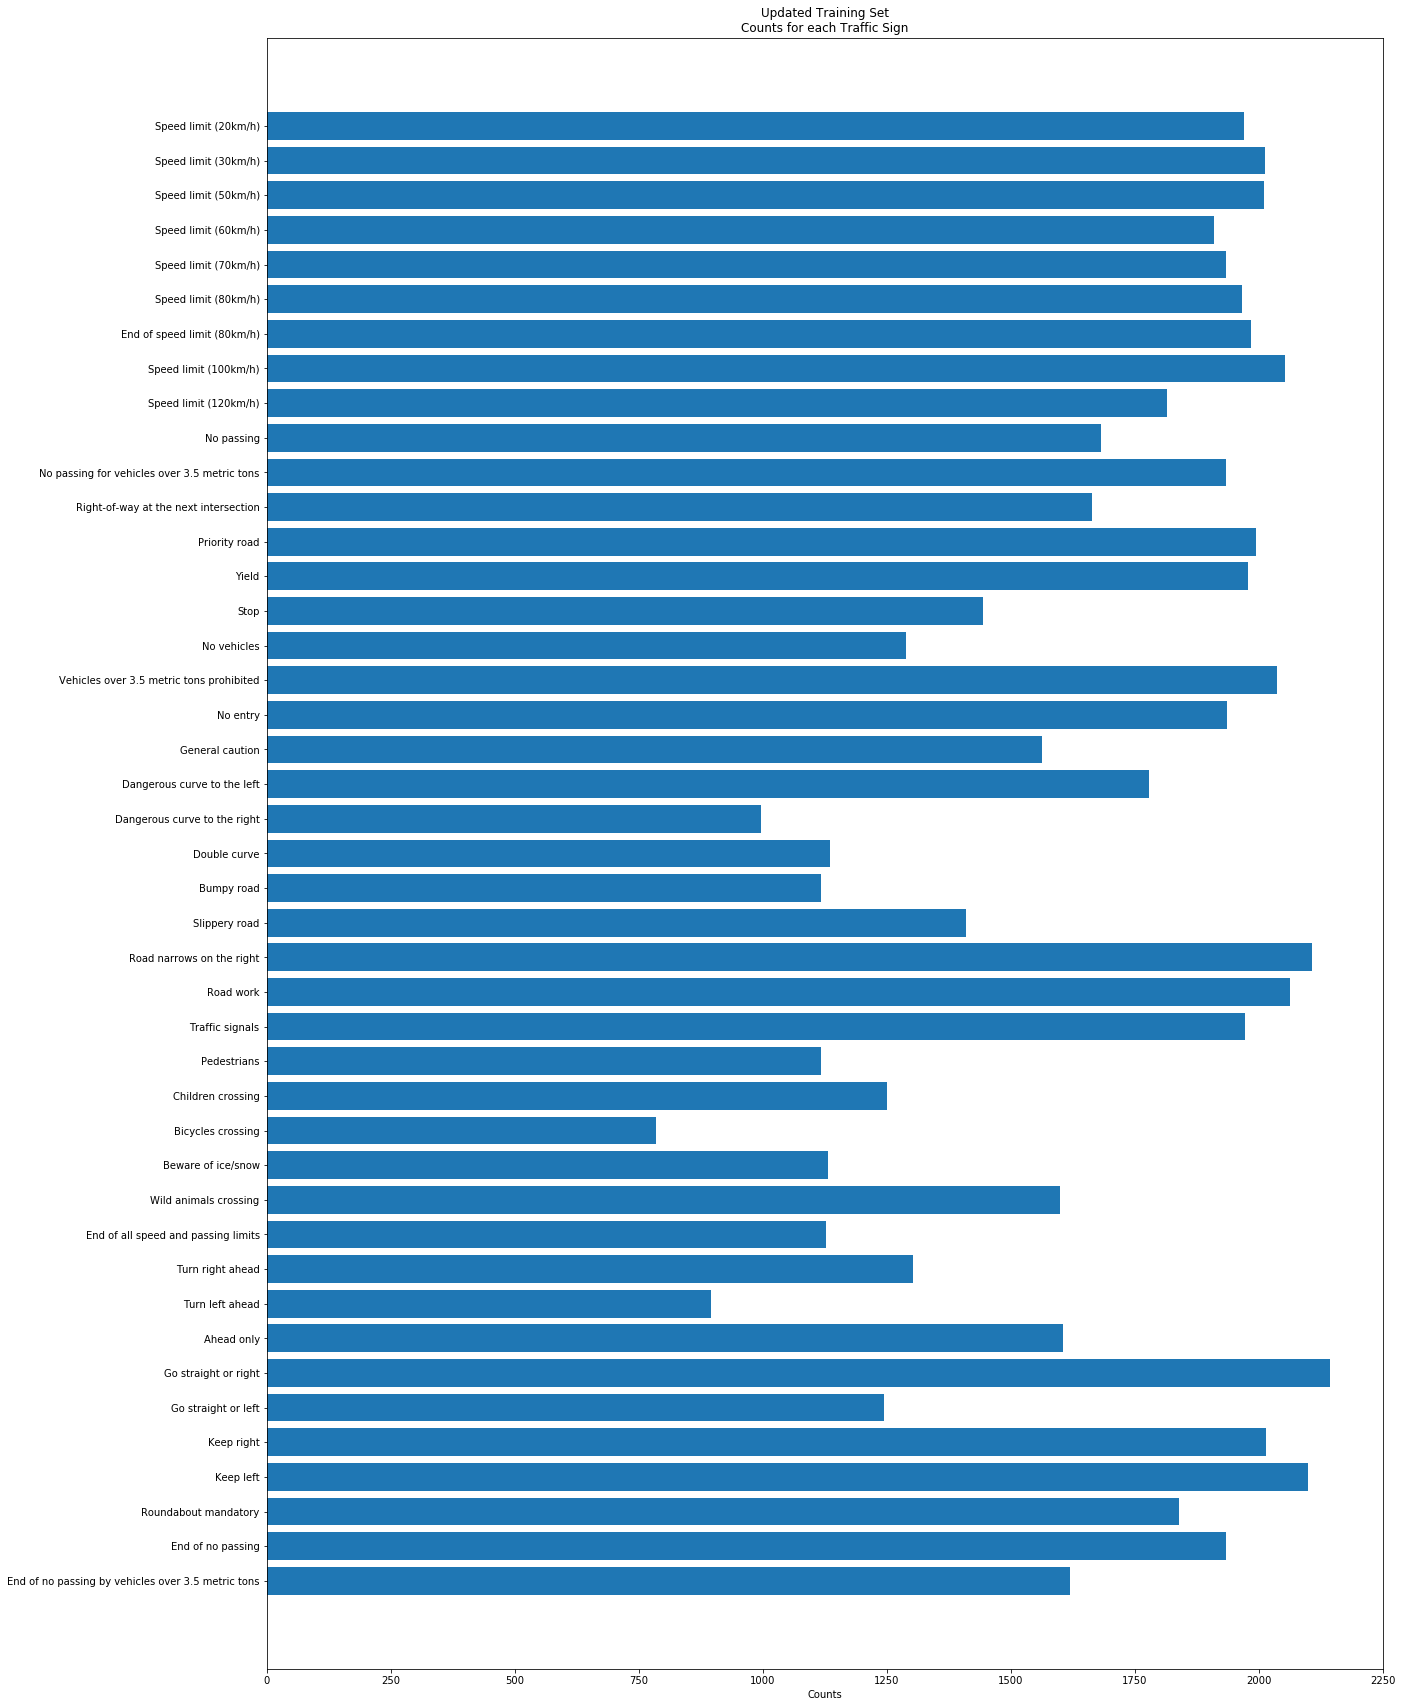

Training Set Max Bin = [36]
Training Set Max value =  2010


In [14]:
### Count of each class in train and validation set

ind = np.arange(n_classes)

hist_train_aug, bins = np.histogram( y_train_aug, n_classes)
bin_max = np.where(hist_train_aug == hist_train_aug.max())
max_bin_val = hist_train.max()


fig, ax = plt.subplots()
#set_train = ax.hist(lab_train, ind)
set_train = ax.barh(ind, hist_train_aug)

# add some text for labels, title and axes ticks
ax.set_xlabel('Counts')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(ind)
ax.set_yticklabels(labels.values())
ax.set_title('Updated Training Set\nCounts for each Traffic Sign')

fig.set_figheight(30)
fig.set_figwidth(20)

plt.show()


print("Training Set Max Bin =", ind[bin_max[0]])
print("Training Set Max value = ", max_bin_val)

### Model Architecture

In [24]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Taken from LeNet Lab
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)    

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [16]:
from tensorflow.contrib.layers import flatten

def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = conv1
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
                     
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = conv2
    
    # SOLUTION: Layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)
    layer3 = conv3

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    
    # Flatten x. Input = 1x1x400. Output = 400.
    layer3flat = flatten(layer3)
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    fc0 = tf.concat_v2([layer3flat, layer2flat], 1)
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)  

    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 43.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(43))    
    logits = tf.matmul(fc0, fc1_W) + fc1_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [42]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)
rate = 0.0009

EPOCHS = 60
BATCH_SIZE = 64

In [86]:
#Training Pipeline
#logits = LeNet(x)
logits = LeNet2(x) #<-------- We're running LeNet2 which is a modified version.


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [87]:
#Model Evaluation (helper function) DON'T EDIT
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Training...

EPOCH 1      Validation Accuracy = 0.771
EPOCH 2      Validation Accuracy = 0.835
EPOCH 3      Validation Accuracy = 0.869
EPOCH 4      Validation Accuracy = 0.891
EPOCH 5      Validation Accuracy = 0.902
EPOCH 6      Validation Accuracy = 0.919
EPOCH 7      Validation Accuracy = 0.924
EPOCH 8      Validation Accuracy = 0.925
EPOCH 9      Validation Accuracy = 0.940
EPOCH 10      Validation Accuracy = 0.946
EPOCH 11      Validation Accuracy = 0.944
EPOCH 12      Validation Accuracy = 0.938
EPOCH 13      Validation Accuracy = 0.958
EPOCH 14      Validation Accuracy = 0.952
EPOCH 15      Validation Accuracy = 0.951
EPOCH 16      Validation Accuracy = 0.952
EPOCH 17      Validation Accuracy = 0.953
EPOCH 18      Validation Accuracy = 0.958
EPOCH 19      Validation Accuracy = 0.957
EPOCH 20      Validation Accuracy = 0.961
EPOCH 21      Validation Accuracy = 0.961
EPOCH 22      Validation Accuracy = 0.963
EPOCH 23      Validation Accuracy = 0.961
EPOCH 24      Validation Accur

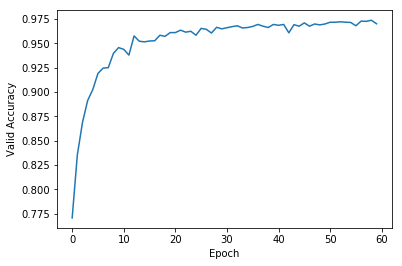

In [91]:
from sklearn.utils import shuffle

cost_vals = []
acc_vals = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            train_op = sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.1})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        
        acc_vals.append(validation_accuracy)
        #if i%10==0 or i==(EPOCHS-1):
        print("EPOCH {}      Validation Accuracy = {:.3f}".format(i+1,validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")


plt.plot(acc_vals)
plt.ylabel('Valid Accuracy')
plt.xlabel('Epoch')
plt.show()

### Model Evaluation (against validation set)

In [92]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.934


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

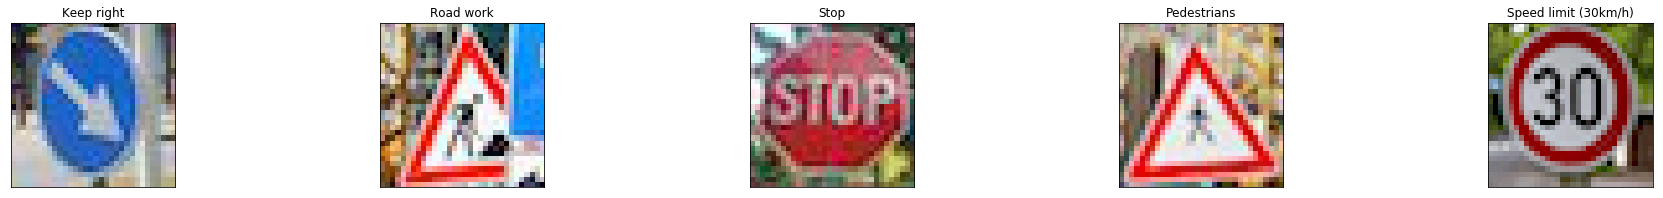

Size of data: 5
Size of data: 5

(5, 32, 32, 3)
normalizing data
(5, 32, 32, 1)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


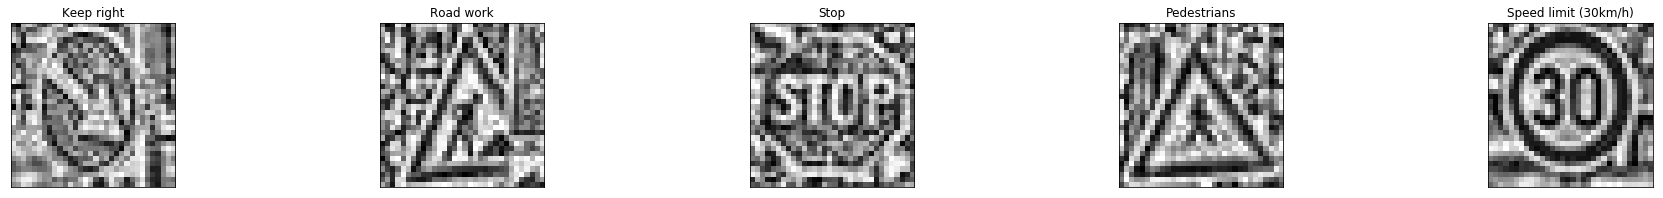

In [93]:
#reading in an image
import os
import cv2
import matplotlib.pyplot as plt
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

X_test_rand = []
y_test_rand = [38,25,14,27,1]

fig = plt.figure(figsize=(32,32))
for i, im in enumerate(os.listdir('test_img/')):
    img = cv2.imread('test_img/' + im)
    X_test_rand.append(img)
    
    img_ycbcr = cv2. cvtColor(img, cv2.COLOR_RGB2YCR_CB)
    #img_ycbcr[:,:,0] = cv2.equalizeHist(img_ycbcr[:,:,0])
    img = cv2. cvtColor(img_ycbcr, cv2.COLOR_YCrCb2BGR)
    
    ax = fig.add_subplot(int(n_classes/5)+1,5,i+1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(img, interpolation='none')
    ax.set_title(labels[y_test_rand[i]])
    
        
    
plt.show()

X_test_rand = np.array(X_test_rand)
y_test_rand = np.array(y_test_rand)

print("Size of data: {}".format(len(X_test_rand)))
print("Size of data: {}".format(len(X_test_rand)))
print()
print( X_test_rand.shape )

if 1:
    print('normalizing data')
    X_test_rand = normalize_batch(X_test_rand) 
    print( X_test_rand.shape )
    fig = plt.figure(figsize=(32,32))
    for i in range(len(y_test_rand)):
        img = X_test_rand[i].squeeze()
        #print( img.shape[:] )
        ax = fig.add_subplot(int(n_classes/5)+1,5,i+1)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.imshow(img, interpolation='none', cmap='gray')
        ax.set_title(labels[y_test_rand[i]])
    plt.show()

        


### Predict the Sign Type for Each Image

In [94]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    private_images_accuracy = evaluate(X_test_rand, y_test_rand)
    print("My Images Accuracy = {:.3f}".format(private_images_accuracy))


Test Accuracy = 0.934
My Images Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

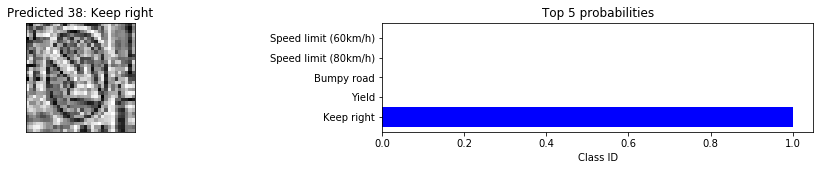

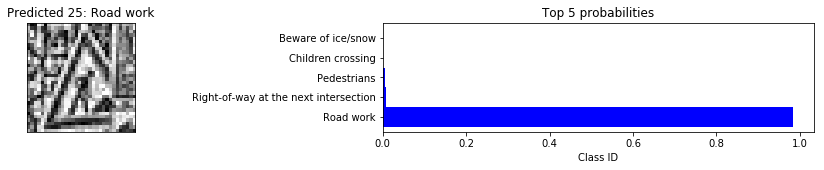

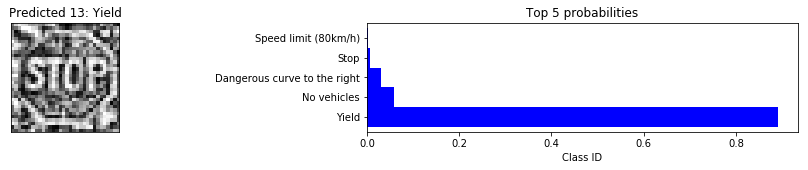

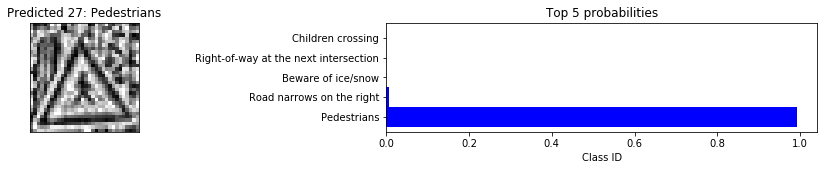

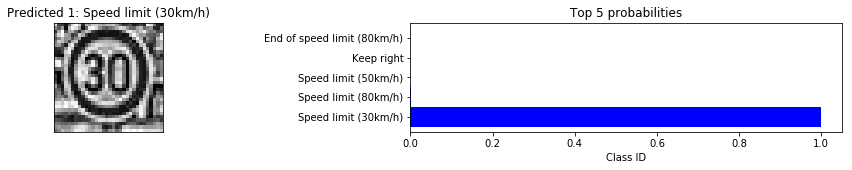

In [95]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def plot_probability_per_class(probabilities, classes, image):   
    ind = np.arange(43)
    ind5 = np.arange(5)
    
    labs = []
    for i in range(5):
        labs.append(labels[classes[0][i]])    
  
    mpl_fig = plt.figure(figsize=(17,2))

    ax = mpl_fig.add_subplot(121)
    ax.set_xticks([])
    ax.set_yticks([])
    title = 'Predicted {}: {}'.format(classes[0][0], labels[classes[0][0]])
    ax.set_title(title)
    ax.imshow(image.squeeze(), cmap='gray' )


    ax = mpl_fig.add_subplot(122)
    #ax.set_ylabel('Probability')
    ax.set_yticks(ind5)    
    ax.set_yticklabels(labs)    
    ax.set_xlabel('Class ID')
    ax.set_title('Top 5 probabilities')
    ax.barh(ind5, probabilities[:][0], 1, color='blue', label='Inputs per class')
    

    
    plt.show()

    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    for i in range(len(X_test_rand)):
        img =  X_test_rand[i]       
        predvals = tf.argmax(logits,1)
        softmax = tf.nn.softmax(logits)
        top_five = tf.nn.top_k(softmax, k=5)    
        classes_out, probs_out  = sess.run([predvals, top_five], feed_dict={x: [img], y: y_test_rand[i], keep_prob: 1.0})
        #print("Probabilities: ", probs_out[0])
        #print("Classes: ", probs_out[1])
        plot_probability_per_class(probs_out[0], probs_out[1], X_test_rand[i])

    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# End